## Project Assignment 3

Nama: A. A. Anggita Yuniskara Dewi

Kode Peserta: PYTN-KS19-025

Sumber: https://archive.ics.uci.edu/dataset/222/bank+marketing

### Import Function 

In [9]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [12]:
file1 = 'C:\\Users\\Anggita\\bank-additional-full.csv'
df_1 = pd.read_csv(file1, delimiter=';')

file2 = 'C:\\Users\\Anggita\\bank-additional.csv'
df_2 = pd.read_csv(file2, delimiter=';')

file3 = 'C:\\Users\\Anggita\\bank-full.csv'
df_3 = pd.read_csv(file3, delimiter=';')

file4 = 'C:\\Users\\Anggita\\bank.csv'
df_4 = pd.read_csv(file4, delimiter=';')

### Data Cleaning

In [13]:
df_1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Melihat Jumlah Data Terduplikasi

In [14]:
print('Duplicated data:', df_1.duplicated().sum())

Duplicated data: 12


Menghapus data yang terduplikat 

In [15]:
df_1.drop_duplicates(inplace=True)

print('Duplicated data:', df_1.duplicated().sum())

Duplicated data: 0


Mengetahui missing value dari seluruh kolom

In [16]:
df_1.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Dataframe yang sudah dibersihkan kemudian diduplikasi dengan tujuan agar data tidak rusak

In [17]:
df_af = df_1.copy()

##### Kolom job

In [18]:
df_af['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

Mengganti 'admin.' menjadi 'admin' dalam kolom 'job'

In [19]:
df_af['job'] = df_af['job'].str.replace('admin.', 'admin', regex=False)

##### Kolom marital

In [20]:
df_af['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

Mengidentifikasi missing value dengan menggunakan np.nan menjadi nan

In [22]:
df_af['marital'] = df_af['marital'].replace('unknown', np.nan)

Mengidentifikasi missing value di kolom marital

In [23]:
df_af['marital'].isna().sum()

80

Missing value tersebut kemudian diisi dengan menggunakan mode() yaitu modus terbanyak pertama [0]

In [25]:
df_af['marital'].fillna(df_af['marital'].mode()[0], inplace=True)

Setelah itu kemudian cek missing value yang sudah dibersihkan

In [27]:
df_af['marital'].isna().sum()

0

##### Kolom education

In [28]:
df_af['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

Mengidentifikasi missing value dengan menggunakan np.nan menjadi nan

In [29]:
df_af['education'] = df_af['education'].replace('unknown', np.nan)

Mengidentifikasi missing value 

In [30]:
df_af['education'].isna().sum()

1730

Missing value tersebut kemudian diisi dengan menggunakan mode() yaitu modus terbanyak pertama [0]

In [34]:
df_af['education'].fillna(df_af['education'].mode()[0], inplace=True)

Setelah itu kemudian cek missing value yang sudah dibersihkan

In [35]:
df_af['education'].isna().sum()

0

Melihat kategori dari kolom education

In [36]:
edu_counts = df_af['education'].value_counts()

print(edu_counts)

university.degree      13894
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
illiterate                18
Name: education, dtype: int64


Mengganti nama kategori dalam kolom education

In [38]:
df_af['education'] = df_af['education'].replace({'basic.4y':'not-graduated',
                                                 'basic.6y':'elementary school',
                                                 'basic.9y':'junior high school', 
                                                 'high.school':'high school',
                                                 'university.degree':'university degree',
                                                 'professional.course':'pre-employment'})

##### Kolom default

In [40]:
df_af['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

Mengidentifikasi missing value dengan menggunakan np.nan menjadi nan

In [41]:
df_af['default'] = df_af['default'].replace('unknown', np.nan)

Mengidentifikasi missing value 

In [42]:
df_af['default'].isna().sum()

8596

Missing value tersebut kemudian diisi dengan menggunakan mode() yaitu modus terbanyak pertama [0]

In [43]:
df_af['default'].fillna(df_af['default'].mode()[0], inplace=True)

Setelah itu kemudian cek missing value yang sudah dibersihkan

In [44]:
df_af['default'].isna().sum()

0

##### Kolom housing

In [45]:
df_af['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

Mengidentifikasi missing value dengan menggunakan np.nan menjadi nan

In [46]:
df_af['housing'] = df_af['housing'].replace('unknown', np.nan)

Mengidentifikasi missing value 

In [47]:
df_af['housing'].isna().sum()

990

Missing value tersebut kemudian diisi dengan menggunakan mode() yaitu modus terbanyak pertama [0]

In [49]:
df_af['housing'].fillna(df_af['housing'].mode()[0], inplace=True)

Setelah itu kemudian cek missing value yang sudah dibersihkan

In [50]:
df_af['housing'].isna().sum()

0

##### Kolom loan 

In [51]:
df_af['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

Mengidentifikasi missing value dengan menggunakan np.nan menjadi nan

In [52]:
df_af['loan'] = df_af['loan'].replace('unknown', np.nan)

Mengidentifikasi missing value 

In [53]:
df_af['loan'].isna().sum()

990

Missing value tersebut kemudian diisi dengan menggunakan mode() yaitu modus terbanyak pertama [0]

In [54]:
df_af['loan'].fillna(df_af['loan'].mode()[0], inplace=True)

Setelah itu kemudian cek missing value yang sudah dibersihkan

In [55]:
df_af['loan'].isna().sum()

0

##### Kolom y

In [56]:
df_af['y'].unique()

array(['no', 'yes'], dtype=object)

Mengidentifikasi missing value

In [57]:
df_af['y'].isna().sum()

0

Mengetahui dtype atau jenis data per kolom

In [59]:
df_af.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

##### Me-mapping kolom dengan tabel yes & no

Merubah kategori 'yes' dan 'no' menjadi 'true' dan 'false'

In [61]:
df_af['default'] = df_af['default'].replace({'yes':True, 'no':False})
df_af['housing'] = df_af['housing'].replace({'yes':True, 'no':False})
df_af['loan'] = df_af['loan'].replace({'yes':True, 'no':False})
df_af['y'] = df_af['y'].replace({'yes':True, 'no':False})

In [62]:
#Melakukan memapping True ke 1 dan False ke 0
mapping = {True:1, False:0}

In [63]:
#Mengubah kolom label 'yes' dan 'no' menjadi numerik untuk membuat mapping 
df_af['default'] = df_af['default'].map(mapping)
df_af['housing'] = df_af['housing'].map(mapping)
df_af['loan'] = df_af['loan'].map(mapping) 
df_af['y'] = df_af['y'].map(mapping)

In [64]:
df_af

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,not-graduated,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high school,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin,married,elementary school,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,pre-employment,0,1,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,pre-employment,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university degree,0,1,0,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,pre-employment,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


### Data Exploration

visualisasi label 'yes' & 'no'

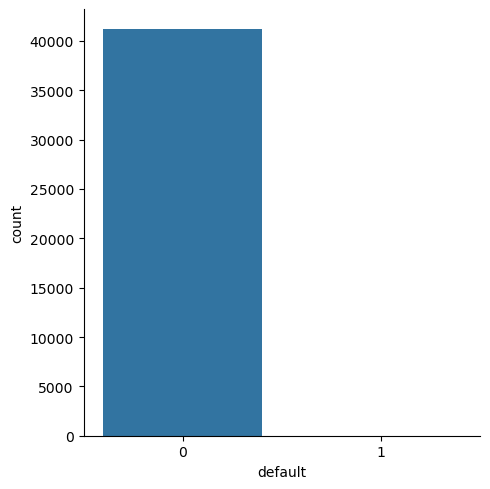

In [67]:
sns.catplot(x='default', data=df_af, kind='count')
plt.show()

Melalui hasil visualisasi data di atas dapat terlihat bahwa kolom default hanya memiliki nilai 'no' yang diwakili dengan nilai 0, sementara nilai 'yes' yang seharusnya tampil dalam visualisasi plot tidak muncul sama sekali. Oleh karena itu, keputusan diambil untuk menghapus kolom 'default', karena tidak ada perbandingan yang dapat digunakan untuk analisis lebih lanjut. 

In [68]:
#Memisahkan kolom numerik dan kolom kategorikal
categorical = df_af.select_dtypes(include = ['object']).columns.tolist()
numeric = df_af.select_dtypes(include = ['int64', 'float64']).columns.tolist()

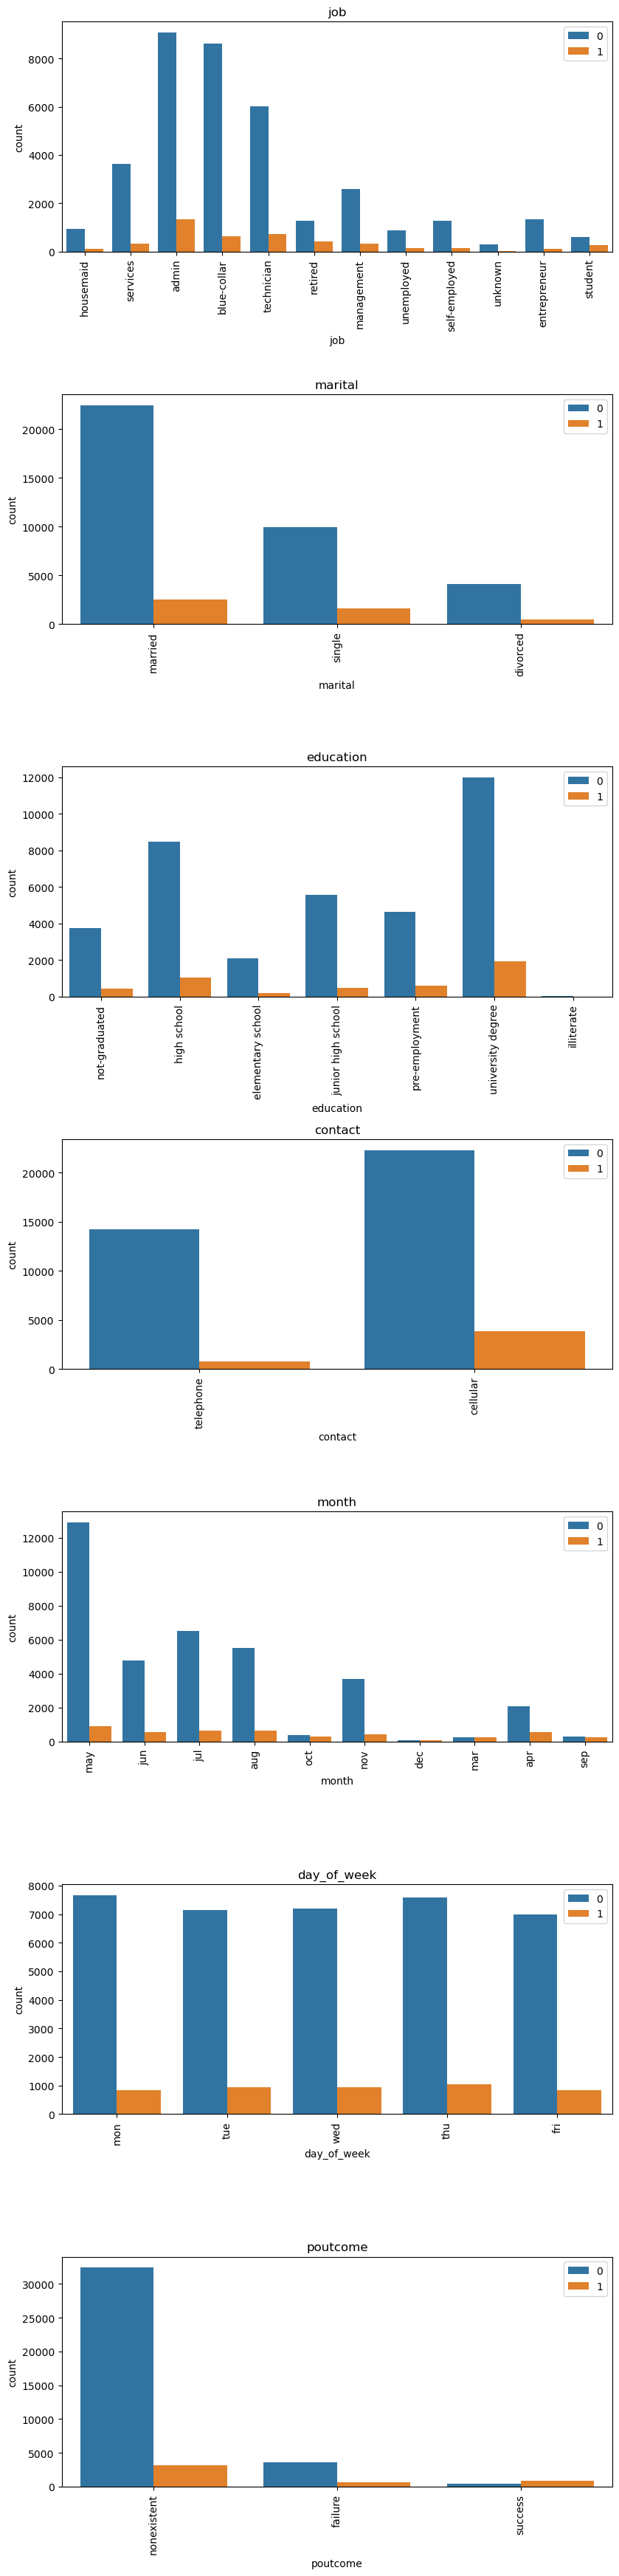

In [72]:
col = categorical 

n_rows=len(col)
n_cols=1

fig,axis=plt.subplots(n_rows, figsize=(n_cols*8.5,n_rows*5))

for r in range(0, n_rows):
    i = r*n_cols
    ax = axis[r]
    sns.countplot(x=col[i], hue='y', data=df_af, ax=ax)
    ax.set_title(col[i])
    ax.legend(loc='upper right')
    ax.tick_params(axis = 'x', labelrotation=90)
    
    
plt.tight_layout()

Melalui visualisasi barplot tersebut tergambarkan bagaimana perbandingan frekuensi antara kategori dalam suatu kolom dengan distribusi baik 'yes' ataupun 'no' dalam menggunakan koordinat 'y'. Melalui visualisasi tersebut juga dapat dipahami bagaimana pengaruh dari masing - masing kategori melalui hasil 'yes' dan 'no' dalam kolom target 'y'.

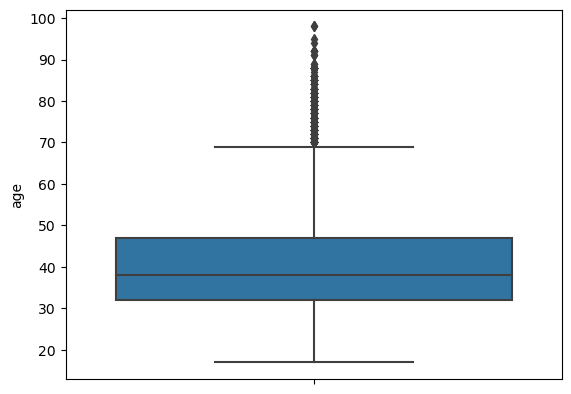

In [74]:
#Memvisualkan kolom age menggunakan boxplot
sns.boxplot(y='age', data=df_af)

plt.show()

Melalui boxplot kita mendapatkan gambaran bagaimana distribusi dari sebuah data numerik, yang mana di dalamnya memberikan informasi mengenai nilai tengah, kuartil, dan data outlier. Selain itu juga dapat memberikan pemahaman bagaimana sejatinya dalam sebuah dataset distribusi dari sebuah kolom secara keseluruhan.

In [75]:
#memilah dan mengidentifikasi fitur untuk membangun model
features = ['age', 'job']

In [76]:
#menjadikan salah satu variabel sebagai target, salah satu contohnya adalah variabel 'y'
x = df_af[features]
y = df_af['y']
x = pd.get_dummies(x, columns=['job'])
y = pd.get_dummies(y)
y = y[1]

In [82]:
#Memisahkan dataset menjadi dua yaitu _train dengan rasio 80% dan _test dengan rasio 20%
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=0)

#Melakukan penormalan fitur dengan menggunakan StandardScaler()
scaler = StandardScaler()

#Menormalkan _train dan _test
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Logistic Regression

In [83]:
logreg = LogisticRegression()

#Melatih model
logreg.fit(x_train, y_train)

LogisticRegression()

In [86]:
#Model yang telah digunakan kemudian digunakan sebagai berikut
y_pred = logreg.predict(x_test)

#Menghitung hasil dari akurasi model 
accuracy = accuracy_score(y_test, y_pred)

print('Nilai Akurasi Model Logistic Regression sebesar: {:.2f}%'.format(accuracy *100))

Nilai Akurasi Model Logistic Regression sebesar: 88.26%


Melalui hasil nilai akurasi model di atas dapat terlihat bahwa hasilnya sebesar 88.26% yang bisa digolongkan dalam range cukup baik, yang mana melalui hasil tersebut masih perlu dilakukan evaluasi lebih lanjut untuk dapat meningkatkan performa dari model. Sehingga nantinya dapat memberikan pembuktian bahwa model dapat memprediksi apakah pelanggan dapat memilih 'yes' yang diwakilkan dengan 1 atau 'no' yang diwakilkan dengan nilai (0). Model dengan akurasi tinggi diharapkan memberikan keuntungan dalam mengidentifikasi pelanggan potensial.

### K-Nearest Neighbors

In [88]:
knn = KNeighborsClassifier(n_neighbors=3)

#melatih model KNN
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [89]:
#Memprediksi data pengujian
y_pred_knn = knn.predict(x_test)

In [90]:
#Menghitung nilai akurasi 
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print('Akurasi Model K-NN: {:.2f}%'.format(accuracy_knn*100))

Akurasi Model K-NN: 83.60%


Jika dibandingkan dengan model sebelumnya, model ini cenderung memiliki nilai akurasi yang lebih rendah walaupun hanya memiliki perbedaan bekisar 5%, tetapi dengan nilai akurasi sebesar 83.60%, model ini dapat digolongkan memiliki akurasi yang cukup baik.
Sama seperti model sebelumnya, model ini juga diharapkan dapat memberikan tingkat akurasi yang tinggi sehingga dapat memberikan keuntungan di dalam mengidentifikasi pelanggan potensial. 

### Support Vector Machine 

In [92]:
#Membuat model 
svm = SVC(kernel = 'rbf', C = 1.0, gamma=0.1)

In [94]:
#Melatih model 
svm.fit(x_train, y_train)

SVC(gamma=0.1)

In [95]:
#Memprediksi data pengujian
y_pred_svm = svm.predict(x_test)

In [96]:
#Menghitung akurasi model
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print('Akurasi Model SVM: {:.2f}%'.format(accuracy_svm * 100))

Akurasi Model SVM: 88.26%


Melalui hasil akurasi model Support Vector Machine (SVM) dapat terlihat bahwa tingkat akurasinya menyamai tingkat akurasi dari logistic regression, di mana melalui nilai akurasi yang dihasilkan dapat diketahui bahwa model SVM memiliki tingkat akurasi yang cukup baik juga. Namun, dalam memberikan prediksi yang akurat akan lebih baik juga jika model ini dievaluasi lebih lanjut, sama dengan dua model sebelumnya. 

### Decision Tree 

In [98]:
#Membuat model 
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=None)

#Melatih model
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [99]:
#Memprediksi data pengujian
y_pred_decision_tree = decision_tree.predict(x_test)

In [100]:
#Menghitung akurasi
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

print('Akurasi Model Decision Tree: {:.2f}%'.format(accuracy_decision_tree *100))

Akurasi Model Decision Tree: 88.25%


Model Decision Tree memiliki akurasi yang hampir mirip dengan dua model sebelumnya yaitu Logistic Regression dan SVM, di mana nilai hasil akurasi dari Decision Tree yaitu sebesar 88.25% yang mana hal ini memberikan indikasi bahwa model ini memiliki kemampuan prediksi yang kurang lebih menyamai dua model sebelumnya. Namun, beberapa hal yang dapat menjadi perhatian adalah Decision Tree dapat cenderung memiliki kemungkinan overfitting ketika tidak memiliki pengaturan yang tepat dan tidak mempertimbangkan parameter. 

Jika dihubungkan dengan finansial atau investasi, tingkat akurasi ini telah mencapai standar yang memuaskan. Model ini menghasilkan data yang stabil dan dapat dipercaya, memberikan kontribusi positif dalam proses pengambilan keputusan. Hal ini berarti model dapat memberikan prediksi yang lebih optimal untuk memahami apakah pelanggan akan melakukan pendaftaran atau tidak.

### Random Forest

In [103]:
#Membuat model 
random_forest = RandomForestClassifier(n_estimators = 100, criterion = 'gini',max_depth=None)

#Melatih model
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [104]:
#Memprediksi data pengujian
y_pred_random_forest = random_forest.predict(x_test)

#Menghitung akurasi model
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

print('Akurasi Model Random Forest: {:.2f}%'.format(accuracy_random_forest * 100))

Akurasi Model Random Forest: 88.25%


Hasil akurasi dari Model Random Forest menunjukkan bahwa tingkat akurasi yang dihasilkan model ini cukup baik, yang mana berada pada angka 88.25% dan tidak begitu jauh dengan tingkat akurasi yang dihasilkan model sebelumnya. 

Random Forest mampu memberikan prediksi yang lebih akurat dan stabil terkait dengan keputusan pelanggan untuk mendaftar atau tidak. Kemampuannya untuk mengatasi overfitting dan menangani variasi dalam dataset membuat Random Forest menjadi alat yang efektif dalam meningkatkan performa model prediksi, sehingga memberikan hasil yang dapat diandalkan dalam proses pengambilan keputusan terkait pendaftaran pelanggan.

### Naive Bayes 

In [106]:
#Membuat model
nb = GaussianNB()

#Melatih model 
nb.fit(x_train, y_train)

GaussianNB()

In [107]:
#Memprediksi data pengujian
y_pred_nb = nb.predict(x_test)

#Menghitung akurasi 
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print('Akurasi Model Naive Bayes: {:.2f}%'.format(accuracy_nb * 100))

Akurasi Model Naive Bayes: 84.35%


melalui hasil di atas dapat terlihat bahwa Model Naive Bayes memiliki tingkat akurasi yang baik juga dengan angka sekitar 84.35%, tetapi angka tersebut cenderung lebih rendah jika dibandingkan dengan tingkat model lainnya yang cenderung berada pada angka 88%. Sehingga dengan ini perli dilakukan evaluasi kembali untuk dapat memastikan apakah model ini benar - benar akurat untuk digunakan di dalam pengambilan keputusan.  

### Confusion Matrix

In [110]:
#Membuat model dengan menggunakan logistic regression
y_pred_logreg = logreg.predict(x_test)

#Mengakumulasikan confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

print('Confusion Matrix menggunakan model Logistic Regression:')
print(cm_logreg)

Confusion Matrix menggunakan model Logistic Regression:
[[7269    0]
 [ 967    0]]


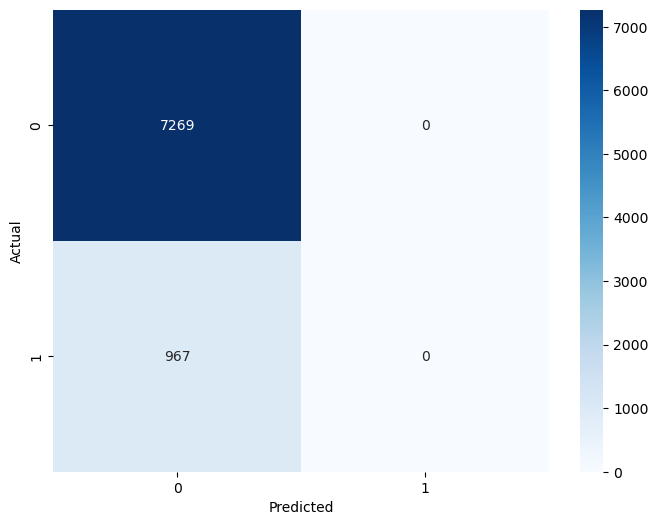

In [111]:
#Memvisualisasikan hasil CM dengan menggunakan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm_logreg, annot = True, fmt='d', cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [113]:
#Membuat model dengan menggunakan SVM
y_pred_svm = svm.predict(x_test)

#Mengakumulasikan confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

print('Confusion Matrix menggunakan model SVM:')
print(cm_svm)

Confusion Matrix menggunakan model SVM:
[[7269    0]
 [ 967    0]]


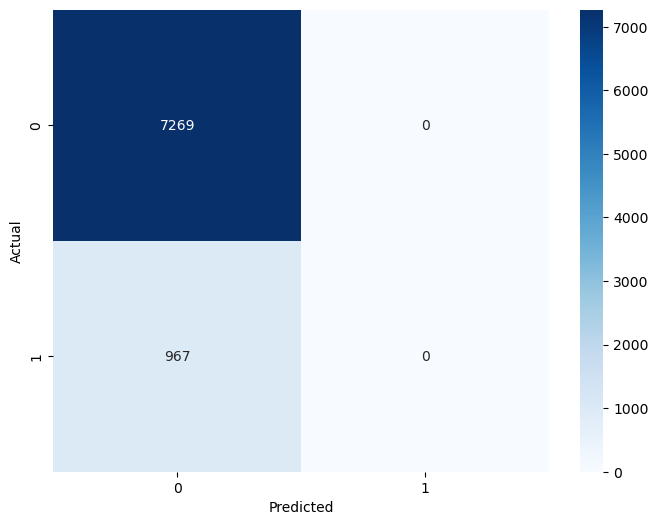

In [114]:
#Memvisualisasikan hasil CM dengan menggunakan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm, annot = True, fmt='d', cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [115]:
#Membuat model dengan menggunakan Decision Tree
y_pred_decision_tree = decision_tree.predict(x_test)

#Mengakumulasikan confusion matrix
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

print('Confusion Matrix menggunakan model Decision Tree:')
print(cm_decision_tree)

Confusion Matrix menggunakan model Decision Tree:
[[7245   24]
 [ 944   23]]


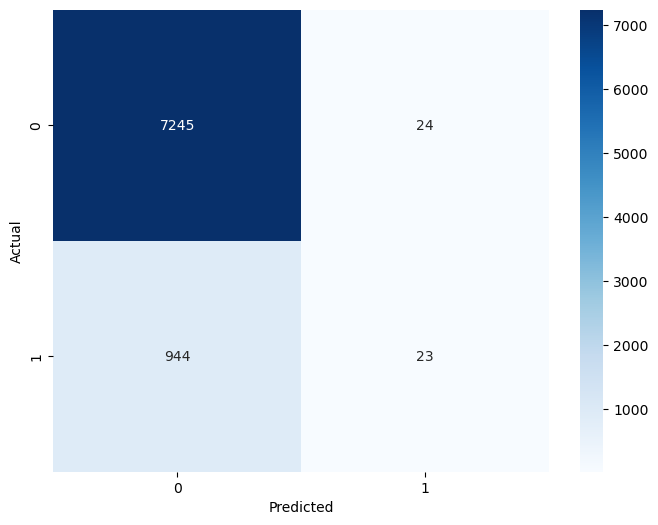

In [116]:
#Memvisualisasikan hasil CM dengan menggunakan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm_decision_tree, annot = True, fmt='d', cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [117]:
#Membuat model dengan menggunakan Random Forest
y_pred_random_forest = random_forest.predict(x_test)

#Mengakumulasikan confusion matrix
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)

print('Confusion Matrix menggunakan model Random Forest:')
print(cm_random_forest)

Confusion Matrix menggunakan model Random Forest:
[[7241   28]
 [ 940   27]]


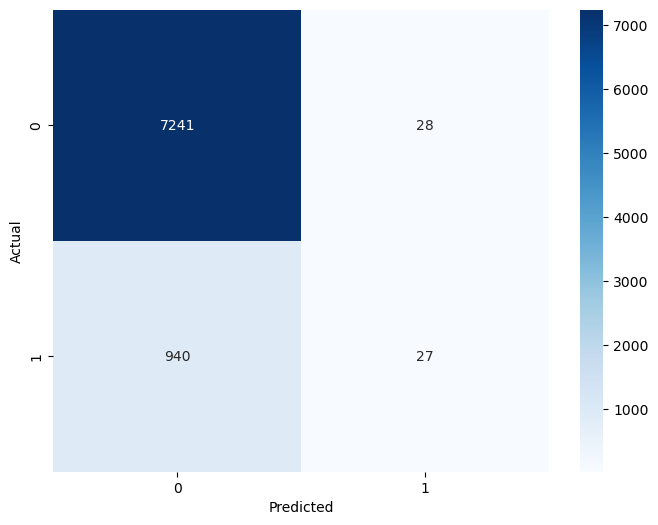

In [118]:
#Memvisualisasikan hasil CM dengan menggunakan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm_random_forest, annot = True, fmt='d', cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Melalui beberapa visualisasi menggunakan heatmap di atas dapat terlihat bahwa Model Decision Tree memiliki angka-angka yang cenderung dibandingkan dengan yang lainnya. 

Pada heatmap decision tree, terdapat 7245 True Positives yang melambangkan jawaban 'yes' dari pelanggan yang diprediksi benar oleh model. Kemudian terdapat 27 True Negatives yang melambangkan jawaban 'no' tetapi diprediksi benar juga. Juga terdapat 940 False Positives yang melambangkan 'no' tetapi diprediksi sebagai 'yes'. Terakhir, terdapat 28 False Negatives yang melambangkan jawaban 'yes' tetapi diprediksi sebagai 'no'. 

Melalui pemodelan ini, dapat diketahui beberapa hal seperti perlunya peningkatan akurasi, upaya mengurangi False Positives dan Negatives untuk semakin baik di dalam memprediksi pendaftaran pelanggan.

### Algorithm Analysis 

Melalu beberapa visualisasi yang dilakukan tadi maka saya memilih Decision Tree dengan tingkat akurasi sebesar 88.25% dengan beberapa alasan seperti:

1. Potensi Akurasi Tinggi
- Keputusan saya untuk menggunakan Decision Tree juga didasarkan pada potensi model ini untuk memberikan akurasi yang tinggi. Meskipun fleksibel dalam menangani pola non-linier, Decision Tree masih mampu memberikan tingkat akurasi yang memuaskan, terutama setelah dilakukan transformasi pada data.

2. Kemampuan Menangani Masalah Overfitting
- Decision Tree dapat mengontrol overfitting dengan pengaturan parameter yang tepat. Hal ini memastikan bahwa model tidak terlalu sesuai dengan data pelatihan dan mampu menggeneralisasi dengan baik pada data baru.

3. Potensi Sebagai Bagian dari Ensemble Learning
- Saya juga melihat bahwa Decision Tree dapat digunakan sebagai komponen dalam ensemble learning, seperti Random Forest atau Gradient Boosted Trees. Dengan cara ini, model dapat ditingkatkan secara keseluruhan, yang dapat berkontribusi pada peningkatan akurasi dan kinerja keseluruhan.